In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True) # Use in Google Colab
#root_path = 'gdrive/My Drive/Colab Notebooks/CS230_PROJECT' # Former path used in Google Colab

# # Ricardo Carrillo AWS path
# root_path = '/home/ubuntu/cs230' 

Using TensorFlow backend.


In [2]:
import os
os.getcwd()
! pip show tensorflow

Name: tensorflow
Version: 2.1.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: d:\anaconda3\lib\site-packages
Requires: wheel, tensorflow-estimator, opt-einsum, six, keras-applications, numpy, keras-preprocessing, wrapt, termcolor, scipy, protobuf, tensorboard, grpcio, gast, google-pasta, absl-py, astor
Required-by: 


In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# files = [f"{root_path}/stock_data/{f}" for f in os.listdir(f"{root_path}/stock_data")]
files = ["train.csv"]
print(files)

['train.csv']


In [26]:
df = pd.DataFrame() # Initializing Dataset

In [27]:
for file in files:
            print(file)
            #Read in file -- note that parse_dates will be need later
            df0 = pd.read_csv(file, names=['open','high','low','close'], index_col=0)
            df = df.append(df0)

train.csv


In [28]:
# Total Size of the Quandl Dataset 634525 Samples
len(df)

746

In [29]:
# Drop Samples with NaN values, final set 373
df=df.dropna() # Just drop samples with Nan 
len(df)

746

In [30]:
# Former links to download prototypes datasets in Colab and AWS
#df = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS230_PROJECT/MSFT_Premium.csv')
#df = pd.read_csv('/home/ubuntu/cs230/MSFT_Premium.csv')

In [31]:
# To check our new dataset
df.head()

,open,high,low,close
0,0.012495,0.011126,0.003252,0.006625
1,0.011439,0.002691,0.001206,0.006947
2,0.000632,0.007277,0.004049,0.000074
3,0.017828,0.028210,0.007758,0.007382
4,0.021115,0.019642,0.009238,0.011499


In [33]:
# We made 9 list to explore differents sizes of datasets
features_considered = ['open','high','low','close']
# 4 features
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x']
# 13 features lists - to explore -
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x','assetturnover','de','debt','divyield','dps','ebit','ebitda','ebitdamargin','ebt','eps','epsdil','equity','ev_y','evebit_y','evebitda_y','gp','grossmargin','invcap','inventory','investments','liabilities','marketcap_y','netinc','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','ps_y','ps1','receivables','revenue','rnd','roa','roe','roic','ros']
# 54 features lists - to explore -
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','deposits','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','fxusd','gp','grossmargin','intangibles','intexp','invcap','invcapavg','inventory','investments','investmentsc','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netincdis','netincnci','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','prefdivis','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharefactor','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
# 41 features lists - to explore -
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x','assetturnover','de','debt','divyield','dps','ebit','ebitda','ebitdamargin','ebt','eps','epsdil','equity','ev_y','evebit_y','evebitda_y','gp','grossmargin','invcap','inventory','investments','liabilities','marketcap_y','netinc','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','ps_y','ps1','receivables','revenue','rnd','roa','roe','roic','ros']
# 41 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt']
# 54 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin']
# 77 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin']
# 98 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp']
# 109 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
#print(len(features_considered))
features = df[features_considered]
# features.index = df['date']            WHHHHHHHHHHHHHAAT!
features.head()

,open,high,low,close
0,0.012495,0.011126,0.003252,0.006625
1,0.011439,0.002691,0.001206,0.006947
2,0.000632,0.007277,0.004049,0.000074
3,0.017828,0.028210,0.007758,0.007382
4,0.021115,0.019642,0.009238,0.011499


In [34]:
TRAIN_SPLIT=np.int(len(df)*0.9) # Split 90-5-5
#features[:,4] = np.log(features[:,4])
dataset = features.values # Convert dataset in a numpy array
#dataset[:,4] = np.log(dataset[:,4]) # Log apply to the volumen 
#print(dataset)
#data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_mean = dataset.mean(axis=0)
print(data_mean[3])
#print(data_mean)
#data_std = dataset[:TRAIN_SPLIT].std(axis=0)
data_std = dataset.std(axis=0)
#print(data_std)
dataset = (dataset-data_mean)/data_std
#dataset[:,4] = np.log(dataset[4,:])

0.01078848972417144


In [35]:
for i in range(0,4):
    print(max(dataset[:,i]),min(dataset[:,i]))
    #print(min(dataset[:,i]))


7.186696532402368 -1.1029893142831146
6.466029033029779 -1.0905625774651917
6.753418930525753 -1.008087100261586
6.804855587323332 -1.1488612016077233


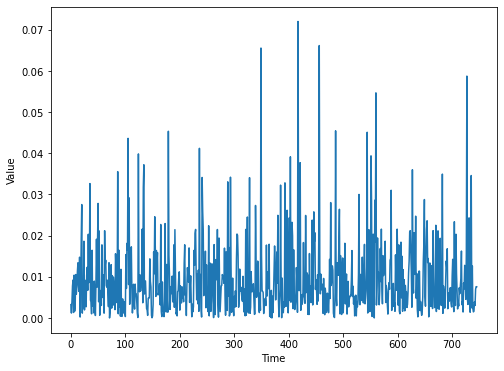

In [37]:
def plot_series(time, series, format="-", start=0, end=None,set=df):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

time=np.arange(len(dataset),dtype="float32")
series_original=(dataset*data_std)+data_mean # To plot the Original Values
plot_series(time, series_original[:,2])

In [38]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])
    #print(labels)
    return np.array(data), np.array(labels)

In [39]:
past_history = 20 #Days taking in the past of each Sample
future_target = 0 # future_target + STEP = days forescat in the future
STEP = 1
np.random.seed(3)

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 3], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 3],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [40]:
# Test to see one x_train and y_train sample 
print ('Single window of past history : {}'.format(x_train_single[0,:])) # check
print ('Single window of past history : {}'.format(x_train_single[0].shape)) # check
print ('Single sample of Future : {}'.format(y_train_single[0,])) # check
print(dataset[0:21,:]) # dataset Check


Single window of past history : [[-0.05450611 -0.14489614 -0.65907657 -0.44616238]
 [-0.14324192 -0.86557867 -0.87958575 -0.41167788]
 [-1.05095179 -0.47368703 -0.5732053  -1.14809391]
 [ 0.39338564  1.314776   -0.17335559 -0.36501109]
 [ 0.66943994  0.58276885 -0.01386059  0.07616102]
 [-1.00513463 -0.91634043 -0.86433872 -0.62388136]
 [-0.28200816  0.27113151  0.11353625 -0.09588647]
 [-0.72721722 -0.61201678 -0.83188026 -0.49826359]
 [-0.74061229 -0.92655927 -0.61549824  0.21881004]
 [ 0.30406372 -0.44447125  0.1287691   0.62481831]
 [-0.27891088 -0.6476819  -0.38494094 -0.93576366]
 [-0.35544293 -0.7611526  -0.21808939 -0.13432818]
 [-0.18317369 -0.15828386  0.21040985 -0.51969945]
 [ 4.8083621   0.18280379  0.43587407  1.70658022]
 [ 0.19757688  1.35048187 -0.16186623 -0.35657044]
 [ 0.37508581 -0.39448858 -0.31443195 -0.7865651 ]
 [-0.21412549 -0.9274108   0.5832016  -0.48732024]
 [-0.7103941  -0.26856256 -0.98344159 -0.82555043]
 [-0.25473058  0.25297042 -0.25856798 -0.60938664]

In [41]:
BATCH_SIZE = 128
BUFFER_SIZE = 1000 # Previous len(df)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [42]:
#print(val_data_single)
#print(x_val_single.shape)
#print(y_val_single.shape)
#print(x_train_single.shape[-2:])
#print(dataset[0:30,:].shape)
for x,y in train_data_single.take(1):
  print("x = ", x.numpy())
  print("y = ", y.numpy())
  

x =  [[[ 0.90449664  0.15004588  0.5393144  -0.04942338]
  [-0.96586425 -0.32064967 -0.05025454 -0.38791338]
  [ 0.0402517   1.33096594 -0.19511155 -0.61296908]
  ...
  [-0.75343553 -0.16703383 -0.27365765  0.87143461]
  [-0.75260204 -0.48614442 -0.11086547 -0.33848325]
  [-0.95391276 -0.68343759 -0.66511707 -0.61932274]]

 [[-0.98574388  0.85801701 -0.54304458 -0.72022788]
  [-0.95068275 -0.86457692 -0.5786543   0.32002377]
  [ 0.86192819 -0.87180674 -0.89882731  0.7723477 ]
  ...
  [-0.61719636 -1.05167592 -0.93720463 -1.13993761]
  [-0.4274417  -0.29308719 -0.41836709 -0.19096252]
  [ 1.60841216 -0.06262184 -0.28967035  1.10296955]]

 [[ 1.30816537  2.01074068  2.82271757  3.59992929]
  [-0.96917268 -0.94795034 -0.89831813 -0.64766754]
  [-1.02199133  0.06356164  0.76962117 -0.39118219]
  ...
  [ 1.24195075  1.15801035  0.94569123  1.46143931]
  [-0.56773445 -0.57778874  0.76340635 -0.16517352]
  [ 4.68644025  2.82944388  3.69367277  5.12144819]]

 ...

 [[-1.02199133  0.06356164  0

We add forget_bias (default: 1) to the biases of the forget gate in order to reduce the scale of forgetting in the beginning of the training.

In [43]:
from keras import regularizers

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
TIME_STEPS=past_history
EPOCHS=50
EVALUATION_INTERVAL=200

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,input_shape=x_train_single.shape[-2:]
                                           ,return_sequences=True,activation='tanh',kernel_initializer='glorot_uniform'
                                           ,activity_regularizer=regularizers.l1(0.01)))
single_step_model.add(tf.keras.layers.LSTM(16,return_sequences=False,activation='tanh',kernel_initializer='glorot_uniform'
                                           ,activity_regularizer=regularizers.l1(0.01)))
single_step_model.add(tf.keras.layers.Dense(16,activation='tanh'))
#single_step_model.add(tf.keras.layers.Dropout(0.2))
#single_step_model.add(tf.keras.layers.Dense(16,activation='tanh'))
single_step_model.add(tf.keras.layers.Dense(8,activation='tanh'))
single_step_model.add(tf.keras.layers.Dense(1))

# Optimizers PRE-DEFINED to Tests
optimizeAdam=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
optimizeAdam1=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
optimizeRMS=tf.keras.optimizers.RMSprop()
optimizeSGD =tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
optimizeSGD1 =tf.keras.optimizers.SGD(lr=0.01, decay=1e-5, momentum=0.9, nesterov=True)

# Compile & Fit
single_step_model.compile(optimizer=optimizeAdam, loss='mae',metrics=["mae"])

single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)



Train for 200 steps, validate for 50 steps
Epoch 1/50
200/200 [==============================] - 9s 44ms/step - loss: 0.8191 - mae: 0.7023 - val_loss: 0.7960 - val_mae: 0.7831
Epoch 2/50
200/200 [==============================] - 2s 9ms/step - loss: 0.7069 - mae: 0.7025 - val_loss: 0.7834 - val_mae: 0.7824
Epoch 3/50
200/200 [==============================] - 2s 8ms/step - loss: 0.7045 - mae: 0.7027 - val_loss: 0.7854 - val_mae: 0.7844
Epoch 4/50
200/200 [==============================] - 2s 8ms/step - loss: 0.7065 - mae: 0.7036 - val_loss: 0.7837 - val_mae: 0.7832
Epoch 5/50
200/200 [==============================] - 2s 8ms/step - loss: 0.7063 - mae: 0.7009 - val_loss: 0.7818 - val_mae: 0.7811
Epoch 6/50
200/200 [==============================] - 2s 8ms/step - loss: 0.7073 - mae: 0.7029 - val_loss: 0.7840 - val_mae: 0.7832
Epoch 7/50
200/200 [==============================] - 2s 8ms/step - loss: 0.7044 - mae: 0.7025 - val_loss: 0.7839 - val_mae: 0.7833
Epoch 8/50
200/200 [============

In [44]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)
  print(single_step_model.predict(x))
  print("y = ", y.numpy())
  #print("x = ", x.numpy())
  #print("y = ", y.numpy())
  #print(single_step_model.predict(x))

(55, 1)
[[-0.23114888]
 [-0.2311487 ]
 [-0.23114914]
 [-0.23114926]
 [-0.23114935]
 [-0.2311494 ]
 [-0.23114929]
 [-0.23114933]
 [-0.23114926]
 [-0.23114944]
 [-0.23114944]
 [-0.23114868]
 [-0.23114863]
 [-0.23114893]
 [-0.23114885]
 [-0.23114887]
 [-0.23114847]
 [-0.23114792]
 [-0.23114738]
 [-0.23114677]
 [-0.2311478 ]
 [-0.23114869]
 [-0.2311491 ]
 [-0.231149  ]
 [-0.23114888]
 [-0.23114873]
 [-0.23114848]
 [-0.23114792]
 [-0.23114848]
 [-0.23114875]
 [-0.23114923]
 [-0.23114958]
 [-0.23114923]
 [-0.2311489 ]
 [-0.23114902]
 [-0.23114894]
 [-0.2311486 ]
 [-0.2311472 ]
 [-0.23114634]
 [-0.23114678]
 [-0.23114797]
 [-0.23114747]
 [-0.23114811]
 [-0.2311483 ]
 [-0.23114842]
 [-0.23114717]
 [-0.23114803]
 [-0.23114777]
 [-0.23114824]
 [-0.23114887]
 [-0.23114921]
 [-0.23114932]
 [-0.23114944]
 [-0.23114926]
 [-0.23114938]]
y =  [-0.2079806  -1.0809139  -0.72495176 -0.9792746  -0.78317658 -0.12373055
 -0.99526486  0.22516375 -0.60277262  0.54244863  0.50110575 -0.32005593
 -0.44567049  0

In [45]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

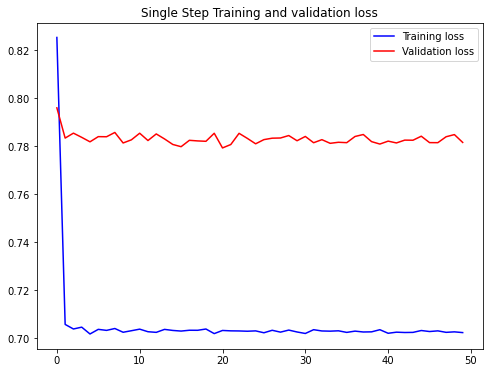

In [46]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')



In [47]:
#single_step_model.predict(x_val_single, batch_size=20, verbose=0)
single_step_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 32)            4736      
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,289
Trainable params: 8,289
Non-trainable params: 0
_________________________________________________________________


In [48]:
#print(x_val_single.shape)
#print(x_val_single)
#print(y.shape)
print(data_std[3])
time=np.arange(len(dataset),dtype="float32")
timev=time[TRAIN_SPLIT:]
print(timev.shape)
print(dataset[-5:,3])


0.009331980900263435
(75,)
[-0.60894428 -0.94309402 -0.46310966 -0.9760438  -0.13165747]


In [49]:
#forecast = []


#for time in range(len(dataset) - past_history):
#  forecast.append(single_step_model.predict(dataset[time:time + past_history][np.newaxis]))

#forecast = forecast[TRAIN_SPLIT-past_history:]
#forecast = forecast[len(dataset)-past_history:]

#results = np.array(forecast)[:, 0, 0]
#print(results.shape)

#val_lapse=len(dataset)-TRAIN_SPLIT
#plt.figure(figsize=(10, 6))
#original_price=(dataset[-val_lapse:,3]*data_std[3])+data_mean[3] # To plot only Validation time

#original_price=(dataset[:,3]*data_std[3])+data_mean[3]
#adjusted_pred =(results*data_std[3])+data_mean[3]

#time=np.arange(len(dataset),dtype="float32") # Total study Time
#timev=time[past_history:] # Prediction time
#time_valid = time[TRAIN_SPLIT:]
#time_valid = time[split_time:]

#plot_series(time, original_price) 
#plot_series(timev, adjusted_pred)

In [51]:
forecast = []
up_real=0
down_real=0
up_r_up_pred=0
up_r_down_pred=0
d_r_up_pred=0
d_r_down_pred=0
mini_data=22000 # Original dataset len(dataset)
pred_ant=1000

# for time in range(mini_data-2000,mini_data - past_history):
for time in range(740):
  forecast.append(single_step_model.predict(dataset[time:time + past_history][np.newaxis]))
  pred=single_step_model.predict(dataset[time:time + past_history][np.newaxis])
  if dataset[time+past_history,3]>dataset[time+past_history-1,3]:  # Up real
    up_real=up_real+1
    if pred > dataset[time+past_history-1,3]: 
      up_r_up_pred=up_r_up_pred+1 # Up Real Prediction Up 
    else:
      up_r_down_pred=up_r_down_pred+1 # Up real Prediction down
  else: # Down Real
    down_real=down_real+1
    if pred < dataset[time+past_history-1,3]: 
      d_r_down_pred=d_r_down_pred+1 # Down real prediction down
    else:
      d_r_up_pred=d_r_up_pred+1 # Down Real prediction up

#forecast = forecast[TRAIN_SPLIT-past_history:]
#forecast = forecast[len(dataset)-past_history:]

results = np.array(forecast)[:, 0, 0]
#print(results.shape)

val_lapse=len(dataset)-TRAIN_SPLIT
plt.figure(figsize=(10, 6))
#original_price=(dataset[-val_lapse:,3]*data_std[3])+data_mean[3] # To plot only Validation time

original_price=(dataset[:,3]*data_std[3])+data_mean[3]
adjusted_pred =(results*data_std[3])+data_mean[3]

time=np.arange(len(dataset),dtype="float32") # Total study Time
timev=time[past_history:] # Prediction time
#time_valid = time[TRAIN_SPLIT:]
#time_valid = time[split_time:]

#plot_series(time, original_price) 
#plot_series(timev, adjusted_pred)
print("Up_real:"+str(up_real))
print("Down_real:"+str(down_real))
print("Up Real Up Prediction:"+str(up_r_up_pred))
print("Up Real Down Prediction:"+str(up_r_down_pred))
print("Down Real Up Prediction:" + str(d_r_up_pred))
print("Down Real Down Prediction:" + str(d_r_down_pred))


IndexError: index 746 is out of bounds for axis 0 with size 746

In [ ]:
import itertools
import numpy as np
import matplotlib.pyplot as plt


from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



class_names = ['NO Increase', 'Increase']



def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylim([1.5, -.5])

    fmt = '.4f' if normalize else 'd'

    thresh = cm.max() - 0.05
    #plt.text(j, i, format(cm[i, j], fmt),

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        #print (cm[i, j])
        plt.text(j, i, format(cm[i, j],fmt),
                 horizontalalignment="center",
                 fontsize=24, 
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Compute confusion matrix

train_cnf_matrix = np.array([[2034, 2169], [5492, 6225]]).T
eval_cnf_matrix = np.array([[27, 25], [3, 15]]).T
np.set_printoptions(precision=2)


# Set model for saving purposes

model = 'shallow_lstm'



# Plot normalized confusion matrix

plt.figure()

plot_confusion_matrix(train_cnf_matrix, classes=class_names, normalize=True)

plt.tight_layout()
plt.show()

#plt.savefig('gdrive/My Drive/Colab Notebooks/CS230_PROJECT/confusion_matrices/%s_train.png' % model)



#plt.figure()

#plot_confusion_matrix(eval_cnf_matrix, classes=class_names, normalize=True)

#plt.savefig('confusion_matrixes/%s_val.png' % model)